<a href="https://colab.research.google.com/github/bryanf98/IA_2020B/blob/main/ANNvsSVM/ANN_Ingreso_de_Adultos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escuela Politécnica Nacional


---


Inteligencia Artificial

Alumno: Bryan Flores Sarango

Fecha:09-02-2021


In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import keras
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

**Cargamos el csv con los datos de entrenamiento:**

In [4]:
uploaded = files.upload()

Saving adult-training.csv to adult-training.csv


In [112]:
def leerData(ruta):
    df = pd.read_csv(ruta, sep=',')
    return df


**Leemos el csv de entrenamiento:**

In [113]:
import pandas as pd
import io

data = leerData('adult-training.csv')


**Campos categoricos con Encode:**

In [114]:
data2=data
from sklearn.preprocessing import LabelEncoder 

caracteristicas=[x for x in data2.columns if data2[x].dtype=="object"]

le=LabelEncoder()

for col in caracteristicas:
    if col in data2.columns:
        i = data2.columns.get_loc(col)
        data2.iloc[:,i] = data2.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

X=data2.iloc[:,:-1]
y=data2.iloc[:,-1].values



**Balanceo de datos:**

In [115]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
#Métodos de sobremuestreo
#SMOTE
smote = SMOTE()

In [116]:
from sklearn.model_selection import train_test_split
Y=y
X,Y = smote.fit_resample(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=7)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Preparamos el modelo, secuencial de 4 capas**

In [117]:
model = Sequential() 
model.add(Dense(10, input_dim=14, kernel_initializer='random_uniform' , activation= "selu" ))
model.add(Dense(8, kernel_initializer='random_uniform' , activation= "selu" ))  
model.add(Dense(6, kernel_initializer='random_uniform' , activation= "relu" )) 
model.add(Dense(1, kernel_initializer='random_uniform' , activation= "sigmoid" )) 
     # Compilamos el  modelo
model.compile(loss= "mean_squared_error" , optimizer= "adam" , metrics=["binary_accuracy"]) 
     # Ajustamos el modelo 

history = model.fit(X_train, y_train, epochs=450, batch_size=20, verbose=0)  
     # evaluate the model 

     


**Accuracy entrenamiento:**

In [118]:
 #Evaluamos    
scores = model.evaluate(X_train, y_train)

#impresión de resultados
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(X_train).round())

1314/1314 [==============================] - 1s 1ms/step - loss: 0.1632 - binary_accuracy: 0.7608

binary_accuracy: 76.08%
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


**Graficamos la perdida en el entrenamiento:**

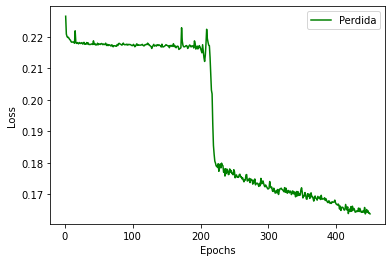

In [119]:
epochs=range(1,451)
perdida = history.history["loss"]
plt.plot(epochs,perdida,'g',label='Perdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

**Graficamos el accuracy:**

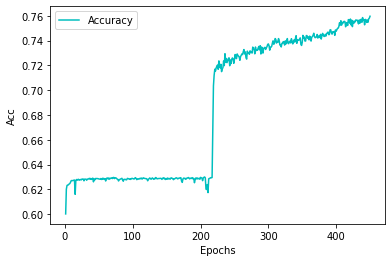

In [120]:
acc=history.history["binary_accuracy"]
plt.plot(epochs,acc,'c',label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

**Accuracy entrenamiento**

In [122]:
scores = model.evaluate(X_test, y_test, verbose=0) 

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
#cvscores.append(scores[1] * 100)

binary_accuracy: 75.53%


**Guardamos el modelo:**

In [123]:
model.save('modeloGuardadoSequential.h5')
print('Modelo Guardado')

Modelo Guardado


In [124]:
from keras.models import load_model
import numpy as np
from google.colab import files

**Cargamos el modelo para testearlo:**

In [125]:
model=load_model('modeloGuardadoSequential.h5')

In [42]:
uploaded = files.upload()

Saving adult-test.csv to adult-test.csv


In [126]:
import pandas as pd
import io
data = pd.read_csv('adult-test.csv')

**Hacemos un encode a los datos a testear:**

In [127]:
data2=data

from sklearn.preprocessing import LabelEncoder 

caracteristicas=[x for x in data2.columns if data2[x].dtype=="object"]

le=LabelEncoder()

for col in caracteristicas:
    if col in data2.columns:
        i = data2.columns.get_loc(col)
        data2.iloc[:,i] = data2.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

X=data2.iloc[:,:-1].values

X = np.asarray(X).astype('float32')

**Predicción:**

In [128]:
Y_predict = model.predict(X)
contador=0
for i in model.predict(X):
  print("La predicción es",X[contador][0]," es ",i)
  contador=contador+1

Se han truncado las últimas 5000 líneas del flujo de salida.
La predicción es 73.0  es  [0.71358585]
La predicción es 33.0  es  [0.04141992]
La predicción es 25.0  es  [0.1844452]
La predicción es 36.0  es  [0.6176674]
La predicción es 25.0  es  [0.153097]
La predicción es 42.0  es  [0.71358585]
La predicción es 54.0  es  [0.38729936]
La predicción es 33.0  es  [0.35828364]
La predicción es 79.0  es  [0.71358585]
La predicción es 48.0  es  [0.9277414]
La predicción es 52.0  es  [0.71358585]
La predicción es 23.0  es  [0.12785721]
La predicción es 25.0  es  [0.09866625]
La predicción es 54.0  es  [0.71358585]
La predicción es 47.0  es  [0.6330415]
La predicción es 21.0  es  [0.04148334]
La predicción es 45.0  es  [0.9451324]
La predicción es 22.0  es  [0.41601604]
La predicción es 27.0  es  [0.19687364]
La predicción es 51.0  es  [0.71358585]
La predicción es 56.0  es  [0.45618632]
La predicción es 31.0  es  [0.2762046]
La predicción es 59.0  es  [0.71358585]
La predicción es 36.0  es  